In [1]:
import pandas as pd
import numpy as np

In [2]:
import string

In [3]:
from datetime import datetime

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/djbetts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/djbetts/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
%pwd

'/Users/djbetts/Documents/data_science/projects/top-25-cigars'

In [10]:
data = pd.read_csv('/Users/djbetts/Documents/data_science/projects/top-25-cigars/data/cigar_aficionado.csv', usecols=['name','tasting_notes','score'])

In [11]:
 # 

In [12]:
df = data.copy()

In [13]:
df.columns

Index(['name', 'score', 'tasting_notes'], dtype='object')

In [14]:
df.shape

(20769, 3)

In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
df.head()

,name,score,tasting_notes
0,BOLIVAR ROYAL CORONA,93,"This is an earthy, rich cigar with a lovely br..."
1,DAVIDOFF GRAN CRU NO. 2,89,An enticing cigar that keeps you coming back f...
2,ASHTON CORONA,86,This cigar is well-made and gives plenty of fl...
3,ASHTON MAGNUM,82,"This is a clean, very mild well-made cigar, wi..."
4,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"Finely constructed, A. Fuente's robusto has a ..."


In [17]:
df['tasting_notes']

0        This is an earthy, rich cigar with a lovely br...
1        An enticing cigar that keeps you coming back f...
2        This cigar is well-made and gives plenty of fl...
3        This is a clean, very mild well-made cigar, wi...
4        Finely constructed, A. Fuente's robusto has a ...
                               ...                        
20764    Chocolate-brown with a multi-seamed cap, this ...
20765    The smoke from this oily robusto imparts a bol...
20766    Dark and well-made with a multi-seamed cap and...
20767    The smoke of this dark, oily cigar is somewhat...
20768    Topped with a triple-seam cap, this Churchill ...
Name: tasting_notes, Length: 20722, dtype: object

In [18]:
X = df.tasting_notes
corpus = list(X)

In [19]:
corpus[0]

'This is an earthy, rich cigar with a lovely brown wrapper and dense spicy aromas. The flavors are mellow with a clean finish. '

In [20]:
y = df.score

In [21]:
from nltk.corpus import stopwords

In [22]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [23]:
#wordnet lemmatizer and lowercase words.
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]
#split article and return quote

In [24]:
# for i, txt in enumerate(test):
#     print(f'{i}: {punc_strip(txt)}')

In [25]:
#removed '-' for strings like 'well-made' or 'full-bodied'
def punc_strip(doc):
    for char in word_tokenize(doc):
        if char in '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~—':
            doc = doc.replace(char, " ")
        if char == "’":
            doc = doc.replace(char, "")
    return doc

In [26]:
%%time
#create vectorizer

vectorizer = CountVectorizer(#input='content', 
    token_pattern=None,
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
                 preprocessor=punc_strip, 
                tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                stop_words='english',
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 2), 
#                  max_df=0.9, 
                min_df=0.01, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 9 μs, sys: 0 ns, total: 9 μs
Wall time: 10 μs


In [27]:
X = vectorizer.fit_transform(corpus)

/Users/djbetts/miniforge3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [38]:
print(len(vectorizer.get_feature_names_out()))

344


In [39]:
from scipy.spatial import distance

In [40]:
a = X[0].toarray()

In [41]:
b = X[100].toarray()

In [ ]:
print(a.shape, b.shape)

In [49]:
distance.cosine(a, b)

np.float64(0.8327515979985818)

In [50]:
a = a.flatten()
b = b.flatten()

In [51]:
print(distance.cosine([1, 0, 0], [0, 1, 0]))

print(distance.cosine([100, 0, 0], [0, 1, 0]))

print(distance.cosine([1, 1, 0], [0, 1, 0]))

1.0
1.0
0.29289321881345254


# min_df_plot

In [53]:
%%time
num_feat_min = []

min_df = np.linspace(0,0.01,15)

for val in min_df:
    vectorizer_plot = CountVectorizer(#preprocessor=punc_strip,
#                 tokenizer=wordnet_tokenize,
                stop_words='english',
            ngram_range=(1,2),
#                 max_df=0.95,
                 min_df=val,
                 max_features=None)
    
    vectorizer_plot.fit(corpus)
    
    features = vectorizer_plot.get_feature_names_out()
    stop_word = vectorizer_plot.get_stop_words()

    num_feat_min.append(len(features))

CPU times: user 4.29 s, sys: 63.7 ms, total: 4.36 s
Wall time: 4.41 s


CPU times: user 3.46 ms, sys: 40 μs, total: 3.5 ms
Wall time: 3.59 ms


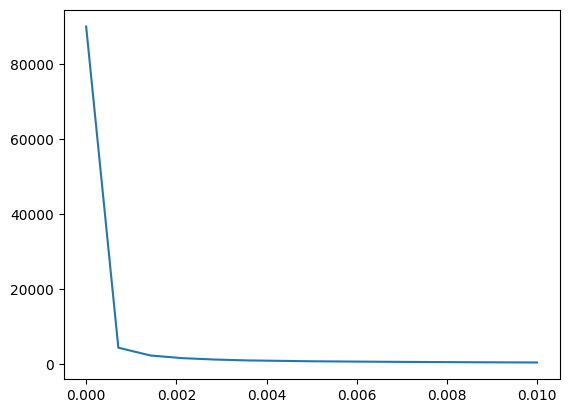

In [54]:
%%time
fig, ax = plt.subplots()
ax.plot(min_df, num_feat_min);

In [55]:
%%time
print(datetime.now())
distortions = []
K = range(1,30)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)

2024-10-11 00:32:27.286001
CPU times: user 11.5 s, sys: 3.54 s, total: 15 s
Wall time: 2.06 s


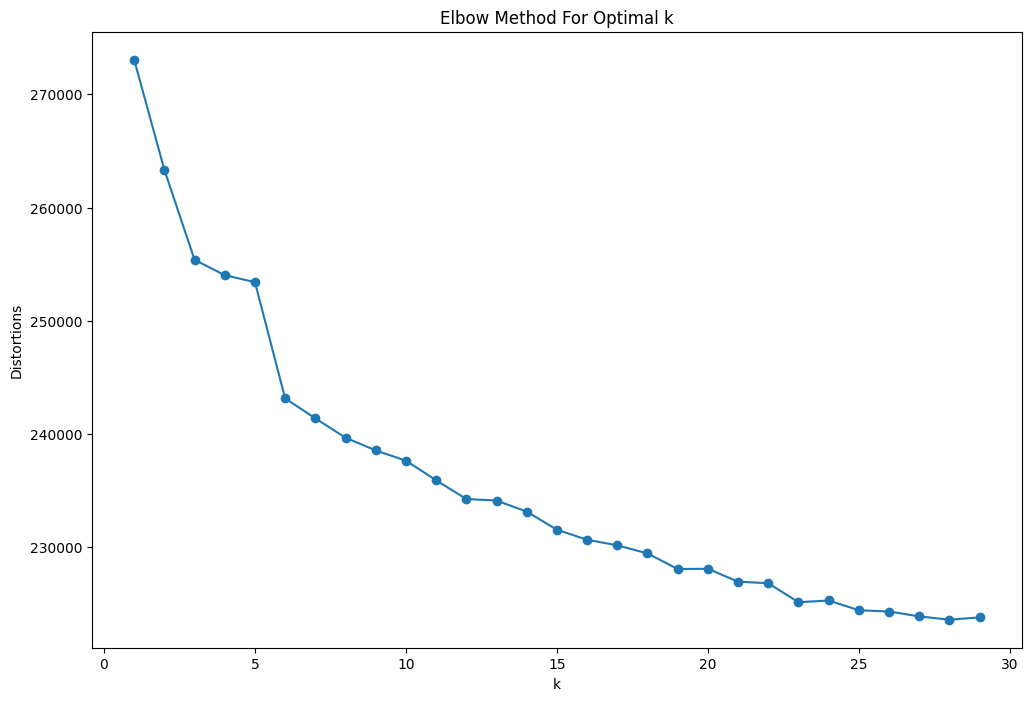

CPU times: user 352 ms, sys: 130 ms, total: 482 ms
Wall time: 64.4 ms


In [56]:
%%time
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title("Elbow Method For Optimal k")
plt.show()

# linear regression

In [57]:
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.feature_selection import SelectKBest

# X, y = X, y

# # This dataset is way too high-dimensional. Better do PCA:
# pca = TruncatedSVD(n_components=2)

# # Maybe some original features where good, too?
# selection = SelectKBest(k=1)

# # Build estimator from PCA and Univariate selection:

# combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# # Use combined features to transform dataset:
# X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")

# svm = SVC(kernel="linear")

# # Do grid search over k, n_components and C:

# pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
# grid_search.fit(X, y)
# print(grid_search.best_estimator_)


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [60]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6447853546105893

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [64]:
X_test.shape

(4145, 344)

In [65]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.10712237e-01 -5.60564949e-01  8.42199805e-01  5.06580474e-01
  2.61791722e-01 -1.21316069e-01 -2.69222751e-02  3.90358222e-01
  1.54714632e-01  4.91688499e-01  9.71450046e-01  3.81584165e-01
  7.15312173e-01  8.33970716e-01  6.17272067e-01  1.57515183e-01
 -6.81825438e-02 -1.22908655e+00  1.06595677e-01 -1.86490029e-01
  1.67804034e-01  4.17157359e-01 -2.55293769e-01 -3.38798890e-02
  7.21162700e-01  2.90297451e-02  5.64040903e-01  3.91086841e-01
  7.57293225e-01  4.11299851e-01  3.77441626e-01  7.12766615e-02
 -1.32055137e-01  5.20831269e-02 -5.60831232e-02 -2.86488573e-02
 -5.94063747e-01 -8.96288163e-02  2.24091772e-01 -1.04793402e-02
  8.00053960e-01 -2.10727484e-01  4.16116691e-01  4.07764059e-01
 -2.29209904e-01 -4.50457876e-01 -3.69177754e-01  1.04798859e+00
  1.13082483e-01  8.95079513e-01  5.34824714e-01  4.99425726e-02
  1.78054381e-02  2.36644007e-02  8.78420705e-02 -2.07056915e-01
  1.95212519e-01  7.76359595e-01  4.50065482e-01  9.10779165e-01
 -1.45002